## Generalized Linear Models
In GLMs, we assume that our target variable follows a specific exponential distribution. Then, we use a link function that links the distribution mean to a linear combination of the regressor variables. In GLM the target is not transformed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import linregress, t, norm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

The following part demonstrates a linear regression in which the target variable is trnasformed. The real data comes from an exponential function and it was transformed by taking its log.

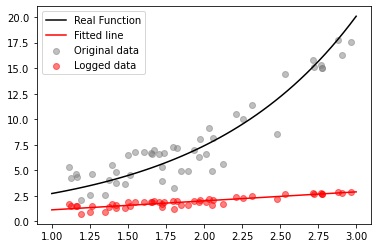

In [3]:
# Creating a set of datapoints that follow an exponential function
x = np.random.uniform(1, 3, size=50)
y = np.exp(x) + np.random.randn(50)*1.5

# Real function
x_coord = np.linspace(1, 3, 50)
y_coord = np.exp(x_coord)

plt.scatter(x=x, y=y, alpha=0.5, color='gray', label='Original data')
plt.plot(x_coord, y_coord, color='black', label='Real Function')

plt.scatter(x=x, y=np.log(y), alpha=0.5, color='red', label='Logged data')

# Fitting a model to the logged data
model = sm.OLS(np.log(y), sm.add_constant(x)).fit()
b0, b1 = model.params
y_fit = b0 + b1 * x_coord
plt.plot(x_coord, y_fit, color='red', label='Fitted line')

plt.legend()
plt.show()

### Binary GLM (Logistic Regression)
In this type of GLMs, we assume that our response (target) variable follows a bernouli distribution, i.e., it can only have the values 0 (failure) or 1 (success). The mean of the bernouli distribution is p, where p is the probability of success. In logistic regression, the link function that links the mean of the assumed distribution to the linear predictor is the logit function, i.e., the log of the odds.

$$ log(\frac{p_i}{1-p_i}) = \beta_0 + \beta_1 \cdot x_i  $$

The probability of success for datapoint i would then be:

$$ p_i = \frac{e^{\beta_0 + \beta_1 \cdot x_i}}{1 + e^{\beta_0 + \beta_1 \cdot x_i}} $$

Notice that in this case we are predicting the probability of success. $\beta_1$ is interpreted as the log of the odds ratio of a one unit increase in X. It is easier to interpret $e^{\beta_1}$ as the odds ratio (The odds corresponding to X+1 divided by the odds corresponding to X).

In [4]:
from scipy.stats import beta, bernoulli

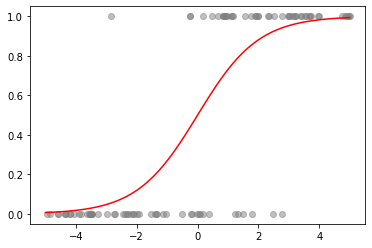

In [5]:
n = 100
x = np.random.uniform(-5, 5, n)

b0 = 0
b1 = 1
p = np.exp(b0 + b1*x) / (1 + np.exp(b0 + b1*x))

# Drawing from a bernoulli distribution with probability p
# Note that this is equivalent to drawing from a binomial with 1 trial
y = bernoulli.rvs(p=p)

plt.scatter(x=x, y=y, color='gray', alpha=0.5)

# Plotting the fit (Which is the parameters we used to generate the data)
x_coord = np.linspace(-5, 5, 100)
y_coord = np.exp(b0 + b1*x_coord) / (1 + np.exp(b0 + b1*x_coord))
plt.plot(x_coord, y_coord, color='red')
plt.show()

Applying Binary GLM to the seatbelts dataset

* [statsmodel GLM docs](https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM)
* [See this answer](https://www.youtube.com/watch?v=npHpBLqkhLg&list=PLpl-gQkQivXji7JK1OP1qS7zalwUBPrX0&index=54)

In [6]:
df = pd.read_csv('Data/seatbelts.csv', index_col=[0])
df['119_death'] = 1 * (df['DriversKilled'] > 119)
df.head(2)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,119_death
1,107,1687,867,269,9059,0.102972,12,0,0
2,97,1508,825,265,7685,0.102363,6,0,0


In [7]:
from statsmodels.genmod.generalized_linear_model import GLM

In [8]:
X = df[['law', 'kms', 'PetrolPrice']].copy()
X['kms'] = (X['kms'] - X['kms'].mean()) / 1000
X['PetrolPrice'] = (X['PetrolPrice'] - X['PetrolPrice'].mean()) / X['PetrolPrice'].std()
X = sm.add_constant(X)

y = df['119_death']

model = GLM(y, X, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              119_death   No. Observations:                  192
Model:                            GLM   Df Residuals:                      188
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -126.81
Date:                Fri, 01 Jul 2022   Deviance:                       253.62
Time:                        22:46:06   Pearson chi2:                     192.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0243      0.161      0.151      0.880      -0.291       0.339
law            -0.6155      0.578     -1.065      0.287      -1.748       0.517
kms            -0.0029      0.060     -0.049      0.961      -0.120       0.114
PetrolPrice    -0.4164      0.170     -2.453      0.014      -0.749      -0.084
===============================================================================
"""

In [9]:
model_list = []

for i in range(3):
    X_model = X.iloc[:, :i+2]
    model = GLM(y, X, family=sm.families.Binomial()).fit()
    print(f'Regressor variables: {list(X_model.columns[1:])}')
    print(np.exp(model.params))
    print('\n')
    print('Confidence intervals:')
    print(np.exp(model.conf_int()))
    print('\n\n')
    model_list.append(model)

Regressor variables: ['law']
const          1.024611
law            0.540359
kms            0.997066
PetrolPrice    0.659411
dtype: float64


Confidence intervals:
                    0         1
const        0.747665  1.404142
law          0.174121  1.676921
kms          0.886709  1.121158
PetrolPrice  0.472801  0.919675



Regressor variables: ['law', 'kms']
const          1.024611
law            0.540359
kms            0.997066
PetrolPrice    0.659411
dtype: float64


Confidence intervals:
                    0         1
const        0.747665  1.404142
law          0.174121  1.676921
kms          0.886709  1.121158
PetrolPrice  0.472801  0.919675



Regressor variables: ['law', 'kms', 'PetrolPrice']
const          1.024611
law            0.540359
kms            0.997066
PetrolPrice    0.659411
dtype: float64


Confidence intervals:
                    0         1
const        0.747665  1.404142
law          0.174121  1.676921
kms          0.886709  1.121158
PetrolPrice  0.472801  0.

In [10]:
model = model_list[1]
pred = np.exp(model.fittedvalues) / (1 + np.exp(model.fittedvalues))
pred.describe()

count    192.000000
mean       0.619575
std        0.029788
min        0.558897
25%        0.601492
50%        0.622024
75%        0.645625
max        0.665723
dtype: float64

In [11]:
y.describe()

count    192.000000
mean       0.489583
std        0.501198
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 119_death, dtype: float64

Fitting a binomial GLM to the number of drivers killed, assuming that this number follows a binomial distribution with a number of trials equal to `drivers` (The total number of drivers killed or seriously injured). Notice that in this case we are observing the numbers of drivers killed out of the drivers killed or injured. In this case, we notice that after the enactment of the seatbelt law, the odds of a driver dying out of the drivers killed or injured increased by about 3%.

In [12]:
y = df[['DriversKilled', 'drivers']].copy()
y['DriversSurvived'] = y['drivers'] - y['DriversKilled']
y = y.drop(columns=['drivers'])

model = GLM(y, X, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['DriversKilled', 'DriversSurvived']   No. Observations:                  192
Model:                                              GLM   Df Residuals:                      188
Model Family:                                  Binomial   Df Model:                            3
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -744.02
Date:                                  Fri, 01 Jul 2022   Deviance:                       229.93
Time:                                          22:54:57   Pearson chi2:                     229.
No. Iterations:                                       6                                         
Covariance Type:                              nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5366      0.007   -342.828      0.000      -2.551      -2.522
law             0.0308      0.027      1.161      0.246      -0.021       0.083
kms             0.0036      0.003      1.334      0.182      -0.002       0.009
PetrolPrice    -0.0078      0.007     -1.047      0.295      -0.022       0.007
===============================================================================
"""

The returned predictions are the binomial probabilities (p), i.e., the tranformed linear predictor using the "expit".

In [13]:
model.fittedvalues.head()

1    0.071901
2    0.071593
3    0.072160
4    0.072454
5    0.072661
dtype: float64

In [16]:
y_hat = X @ model.params.to_numpy().reshape(-1, 1)

p_hat = (np.exp(y_hat) / (1 + np.exp(y_hat))).to_numpy().flatten()

np.isclose(p_hat, model.fittedvalues).mean()

1.0

## Poisson GLMs

In [17]:
from scipy.stats import poisson

In [18]:
df = pd.read_csv('Data/gaData.csv', index_col=[0], parse_dates=[1])
display(df.head(2))
df['date'] = df['date'].apply(pd.Timestamp.to_julian_date)
df['date'] = df['date'] - df['date'].min()

,date,visits,simplystats
1,2011-01-01,0,0
2,2011-01-02,0,0


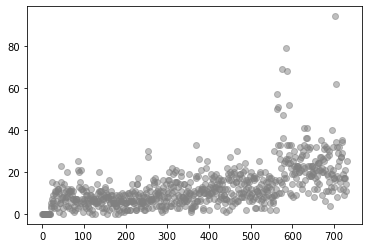

In [19]:
plt.scatter(x='date', y='visits', data=df, color='gray', alpha=0.5)
plt.show()

Fitting a linear regression to the data:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 visits   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     358.6
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           2.44e-65
Time:                        22:55:59   Log-Likelihood:                -2589.9
No. Observations:                 731   AIC:                             5184.
Df Residuals:                     729   BIC:                             5193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5332      0.619      4.093      0.000       1.318       3.748
date           0.0278      0.001     18.936      0.000       0.025       0.031
==============================================================================
Omnibus:                      473.014   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7906.087
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      18.226   Cond. No.                         842.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

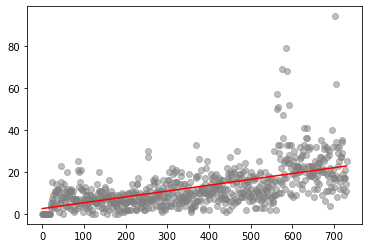

In [20]:
X = sm.add_constant(df[['date']])
y=  df['visits']

model = sm.OLS(y, X).fit()
display(model.summary())

y_hat = model.fittedvalues

plt.plot(X['date'], y_hat, color='red')
plt.scatter(x='date', y='visits', data=df, color='gray', alpha=0.5)
plt.show()

Plotting residuals

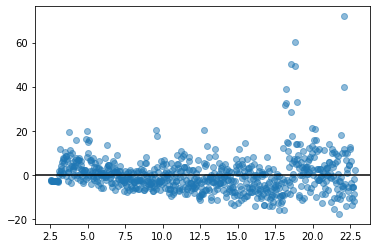

In [21]:
plt.scatter(x=model.fittedvalues, y=model.resid, alpha=0.5)
plt.axhline(y=0, color='black')
plt.show()

Fitting a linear model to the logged counts

In [22]:
y = np.log(df['visits']+1)

log_model = sm.OLS(y, X).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 visits   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     443.7
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           2.63e-77
Time:                        22:56:12   Log-Likelihood:                -692.56
No. Observations:                 731   AIC:                             1389.
Df Residuals:                     729   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5078      0.046     32.650      0.000       1.417       1.598
date           0.0023      0.000     21.065      0.000       0.002       0.003
==============================================================================
Omnibus:                       48.777   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.725
Skew:                          -0.616   Prob(JB):                     1.77e-13
Kurtosis:                       3.639   Cond. No.                         842.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model parameters (Exponential of the logged data model parameters) can be interpreted as a 0.2% increase per unit change in X, i.e., daily increase, in visits.

In [23]:
np.exp(log_model.params)

const    4.516567
date     1.002310
dtype: float64

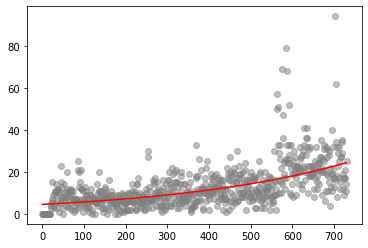

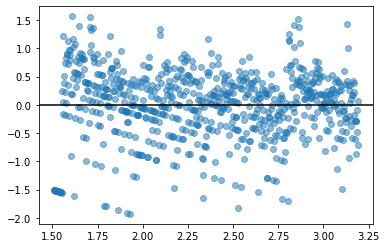

In [24]:
y_hat = np.exp(log_model.fittedvalues)

plt.plot(X['date'], y_hat, color='red')
plt.scatter(x='date', y='visits', data=df, color='gray', alpha=0.5)
plt.show()

plt.scatter(x=log_model.fittedvalues, y=log_model.resid, alpha=0.5)
plt.axhline(y=0, color='black')
plt.show()

Fitting a Poisson model to the data

In [25]:
from scipy.stats import poisson

In [26]:
df = pd.read_csv('Data/gaData.csv', index_col=[0], parse_dates=[1])
display(df.head(2))
df['date'] = df['date'].apply(pd.Timestamp.to_julian_date)
df['date'] = df['date'] - df['date'].min()

,date,visits,simplystats
1,2011-01-01,0,0
2,2011-01-02,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 visits   No. Observations:                  731
Model:                            GLM   Df Residuals:                      729
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3032.8
Date:                Fri, 01 Jul 2022   Deviance:                       3121.6
Time:                        22:58:42   Pearson chi2:                 3.41e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5886      0.026     59.987      0.000       1.537       1.641
date           0.0023   5.27e-05     43.547      0.000       0.002       0.002
==============================================================================
"""

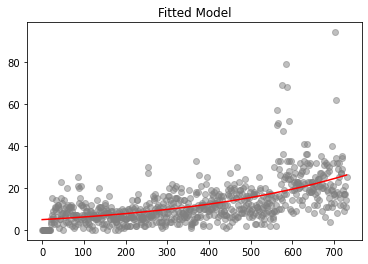

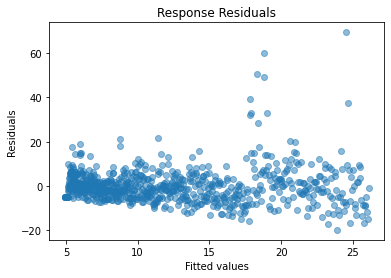

In [27]:
from statsmodels.genmod.generalized_linear_model import GLM

X = sm.add_constant(df[['date']])
y =  df['visits']

model = GLM(y, X, family=sm.families.Poisson()).fit()
display(model.summary())

# Plotting fitted model
y_hat = model.fittedvalues

plt.plot(X['date'], y_hat, color='red')
plt.scatter(x=X['date'], y=y, color='gray', alpha=0.5)
plt.title('Fitted Model')
plt.show()

# Plotted fitted values vs residuals
plt.scatter(x=y_hat, y=y-y_hat, alpha=.5)
plt.title('Response Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Note that there are different types of residuals for GLM models (see [this](https://www.statsmodels.org/0.6.1/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html) and [this](https://stats.stackexchange.com/questions/1432/what-do-the-residuals-in-a-logistic-regression-mean)). Given that the mean is equal to the variance in the Poisson distribution, we should notice an increase in variance for increased mean fitted values.

Fitting a Poisson model to the Seatbelts data

In [28]:
df = pd.read_csv('Data/seatbelts.csv', index_col=[0])

df.head(2)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
1,107,1687,867,269,9059,0.102972,12,0
2,97,1508,825,265,7685,0.102363,6,0


In [29]:
y = df['DriversKilled']
X = sm.add_constant(df[['law', 'kms', 'PetrolPrice']])
X['kms'] = (X['kms'] - X['kms'].mean()) / 1000
X['PetrolPrice'] = (X['PetrolPrice'] - X['PetrolPrice'].mean()) / X['PetrolPrice'].std()

model = GLM(y, X, family=sm.families.Poisson()).fit()
display(model.summary().tables[1])
np.exp(model.params)

,coef,std err,z,P>|z|,[0.025,0.975]
const,4.8198,0.007,676.243,0.000,4.806,4.834
law,-0.1149,0.026,-4.495,0.000,-0.165,-0.065
kms,-0.0100,0.003,-3.818,0.000,-0.015,-0.005
PetrolPrice,-0.0554,0.007,-7.643,0.000,-0.070,-0.041


const          123.945895
law              0.891476
kms              0.990069
PetrolPrice      0.946143
dtype: float64

The interpretation of the parameters is as follows:
* The introduction of the law resulted in a drop of about 11% in the expected deaths for a constant PetrolPrice and kms
* An increase of 1000 miles results in a 1% decrease in the expected deaths
* An increase of 1 standard deviation (Remember that we centered the petrol price variable) in petrol price results in a 5% drop in the expected deaths.
* The intercept represents the log of the expected value of deaths when the other variables are 0, i.e., law was not enacted, the kms are equal to the mean kms (because we centered), and the petrol price is equal to the mean petrol price (again because we centered)

Fitting a log-linear model to the same data

In [30]:
y = np.log(df['DriversKilled'])
X = sm.add_constant(df[['law', 'kms', 'PetrolPrice']])
X['kms'] = (X['kms'] - X['kms'].mean()) / 1000
X['PetrolPrice'] = (X['PetrolPrice'] - X['PetrolPrice'].mean()) / X['PetrolPrice'].std()

model = sm.OLS(y, X).fit()
display(model.summary().tables[1])
np.exp(model.params)

,coef,std err,t,P>|t|,[0.025,0.975]
const,4.8054,0.014,333.435,0.000,4.777,4.834
law,-0.1315,0.048,-2.726,0.007,-0.227,-0.036
kms,-0.0082,0.005,-1.538,0.126,-0.019,0.002
PetrolPrice,-0.0540,0.015,-3.643,0.000,-0.083,-0.025


const          122.169543
law              0.876822
kms              0.991844
PetrolPrice      0.947462
dtype: float64

In this case our interpretation of the relative increase/decrease is in respect to the geometric mean. The intercept in this case is the expected value of the log of count of deaths when the other variables are at zero.